In [1]:
import pandas as pd
import re

In [2]:
data=pd.read_csv("../data/laptops.csv",encoding = "ISO-8859-1",index_col=0)

In [3]:
data["Cpu"].head()

1          Intel Core i5 2.3GHz
2          Intel Core i5 1.8GHz
3    Intel Core i5 7200U 2.5GHz
4          Intel Core i7 2.7GHz
5          Intel Core i5 3.1GHz
Name: Cpu, dtype: object

In [4]:
#%%timeit
Peso = []
for w in data["Weight"]:
    Peso.append(float(re.split("kg",w)[0]))


In [5]:
Mem = []
for r in data["Ram"]:
    Mem.append(int(re.split("GB",r)[0]))

In [6]:
data["Weight"]=Peso
data["Ram"]=Mem

In [7]:
#Per il futuro, ti consiglio di usare la funzione map (simile ad apply su R) per manipolare colonne dei df, è memory-efficient, parallelizzabile,e ottimizzata low level
#Tipo

#data["Weight"]=data.Weight.map(lambda x: float(re.split("kg",x)[0]))

In [8]:
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [9]:
data.loc[max(data.groupby("Company")["Price_euros"].idxmax())]

Company                                    Acer
Product                         Predator G9-793
TypeName                                 Gaming
Inches                                     17.3
ScreenResolution    IPS Panel Full HD 1920x1080
Cpu                 Intel Core i7 7700HQ 2.8GHz
Ram                                          16
Memory                     256GB SSD +  1TB HDD
Gpu                     Nvidia GeForce GTX 1070
OpSys                                Windows 10
Weight                                      4.2
Price_euros                                2599
Name: 1207, dtype: object

In [10]:
df = data.rename({"Price_euros": 'Price'}, axis=1)  # new method

In [11]:
df["Memory"].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [12]:
#Ghz=re.compile("\d(.\d)*GHz")
Ghz=re.compile("\d(\.\d+)*GHz")

In [13]:
Ghz.search(df["Cpu"][383]).group()

'1.60GHz'

In [14]:
proc=df["Cpu"]

In [15]:
Cpu=[]
for i in proc:
    Cpu.append(Ghz.search(i).group())
    

In [16]:
df["Frequenza"]= Cpu

In [17]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Frequenza
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3GHz
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.8GHz
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,2.5GHz
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7GHz
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1GHz


In [18]:
Res = re.compile("\d+x\d+")
Risol = []
for i in df["ScreenResolution"]:
    Risol.append(Res.search(i).group())

In [19]:
df["Risoluzione"]= Risol

In [20]:
Res = re.compile("(\d+)x(\d+)")

In [21]:
Pixel = []
for i in df["Risoluzione"]:
    G = Res.search(i)
    Tot=int(G.group(1))*int(G.group(2))
    Pixel.append(Tot)
    

In [22]:
df["Pixel"]= Pixel

In [23]:
re.compile

<function re.compile(pattern, flags=0)>

In [24]:
df2 = df

In [25]:
w=re.compile("SSD")
SSD = []
for i in df["Memory"]:
    if (w.findall(i)==[]): 
        SSD.append(False)
    else: SSD.append(True)

### Creo colonna Frequenza

In [26]:
Freq = []
for r in df2["Frequenza"]:
    Freq.append(float(re.split("GHz",r)[0]))
df2["Frequenza"]= Freq

In [27]:
df2.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Frequenza,Risoluzione,Pixel
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,2560x1600,4096000
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,1440x900,1296000
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,2.5,1920x1080,2073600
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,2880x1800,5184000
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,2560x1600,4096000


In [28]:
df2.to_csv("Laptop2.csv")

In [29]:
df2.groupby("Memory")["Price"].max()

Memory
1.0TB HDD                         659.00
1.0TB Hybrid                     1099.00
128GB Flash Storage              1099.00
128GB HDD                         590.00
128GB SSD                        1599.00
128GB SSD +  1TB HDD             3012.77
128GB SSD +  2TB HDD              985.00
16GB Flash Storage                459.90
16GB SSD                          265.00
180GB SSD                        1364.00
1TB HDD                          2899.00
1TB HDD +  1TB HDD                621.45
1TB SSD                          6099.00
1TB SSD +  1TB HDD               3659.40
240GB SSD                        3100.00
256GB Flash Storage              2139.97
256GB SSD                        4389.00
256GB SSD +  1.0TB Hybrid        2749.99
256GB SSD +  1TB HDD             3149.00
256GB SSD +  256GB SSD           1298.00
256GB SSD +  2TB HDD             2449.00
256GB SSD +  500GB HDD           2103.34
2TB HDD                           989.99
32GB Flash Storage                659.00
32GB HDD 

In [30]:
df2["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [31]:
df2.loc[df2["Price"].idxmax()]

Company                                           Razer
Product                                       Blade Pro
TypeName                                         Gaming
Inches                                             17.3
ScreenResolution    4K Ultra HD / Touchscreen 3840x2160
Cpu                         Intel Core i7 7820HK 2.9GHz
Ram                                                  32
Memory                                          1TB SSD
Gpu                             Nvidia GeForce GTX 1080
OpSys                                        Windows 10
Weight                                             3.49
Price                                              6099
Frequenza                                           2.9
Risoluzione                                   3840x2160
Pixel                                           8294400
Name: 200, dtype: object

In [32]:
df2.loc[df2.groupby("TypeName")["Price"].idxmin()]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Frequenza,Risoluzione,Pixel
319,Asus,VivoBook Flip,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Celeron Dual Core N3350 1.1GHz,2,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.10,275.0,1.10,1366x768,1049088
92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8,1TB HDD,AMD Radeon RX 560,Windows 10,2.45,699.0,3.00,1920x1080,2073600
1233,Acer,C740-C9QX (3205U/2GB/32GB/Chrome,Netbook,11.6,1366x768,Intel Celeron Dual Core 3205U 1.5GHz,2,32GB SSD,Intel HD Graphics,Chrome OS,1.30,174.0,1.50,1366x768,1049088
1135,Vero,V131 (X5-Z8350/4GB/32GB/FHD/W10),Notebook,13.3,Full HD 1920x1080,Intel Atom X5-Z8350 1.44GHz,4,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.35,196.0,1.44,1920x1080,2073600
402,HP,15-BW004nv (A9-9420/4GB/256GB/Radeon,Ultrabook,15.6,Full HD 1920x1080,AMD A9-Series 9420 3GHz,4,256GB SSD,AMD Radeon 520,Windows 10,1.91,499.0,3.00,1920x1080,2073600
393,Dell,Precision 3510,Workstation,15.6,Full HD 1920x1080,Intel Core i5 6440HQ 2.6GHz,8,500GB HDD,AMD FirePro W5130M,Windows 10,2.23,1369.0,2.60,1920x1080,2073600


In [33]:
df2.loc[df2.groupby("Company")["Price"].idxmax()]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Frequenza,Risoluzione,Pixel
1207,Acer,Predator G9-793,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.20,2599.00,2.8,1920x1080,2073600
18,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.9GHz,16,512GB SSD,AMD Radeon Pro 560,macOS,1.83,2858.00,2.9,2880x1800,5184000
1081,Asus,ROG G701VO,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58,3975.00,2.7,1920x1080,2073600
428,Chuwi,LapBook 12.3,Notebook,12.3,IPS Panel Retina Display 2736x1824,Intel Celeron Quad Core N3450 1.1GHz,6,64GB Flash Storage,Intel HD Graphics 500,Windows 10,1.40,449.00,1.1,2736x1824,4990464
731,Dell,Alienware 17,Gaming,17.3,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,32,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36,3659.40,2.8,3840x2160,8294400
630,Fujitsu,LifeBook A557,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.20,799.00,2.5,1366x768,1049088
444,Google,Pixelbook (Core,Ultrabook,12.3,Touchscreen 2400x1600,Intel Core i7 7Y75 1.3GHz,16,512GB SSD,Intel HD Graphics 615,Chrome OS,1.10,2199.00,1.3,2400x1600,3840000
758,HP,Zbook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5 2.9GHz,16,256GB SSD,Nvidia Quadro M2000M,Windows 7,3.00,4389.00,2.9,1920x1080,2073600
219,Huawei,MateBook X,Ultrabook,13.0,IPS Panel Full HD 2160x1440,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.05,1499.00,2.7,2160x1440,3110400
686,LG,Gram 15Z975,Ultrabook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.09,2299.00,1.8,1920x1080,2073600


In [34]:
#df=pd.read_csv("laptop2.csv",encoding = "ISO-8859-1",index_col=0)

### Creo variabile compagnia della scheda grafica

In [35]:
re.split("(\s)",df["Gpu"][1])[0]

'Intel'

In [36]:
GpuCompany=[]
for i in df["Gpu"]:
    Com=re.split("(\s)",i)[0]
    GpuCompany.append(Com)
df["GpuCompany"]=GpuCompany

### Memoria totale (SSD)

In [37]:
MemoriaSSD = []
s=re.compile("(\d+)GB SSD")
for r in df["Memory"]:
    a=s.findall(r)
    if a == [] : MemoriaSSD.append(0)
    else: MemoriaSSD.append(int(a[0]))
df["MemoriaSSD"]=MemoriaSSD

In [38]:
df["SolidStateDisk"]=df["MemoriaSSD"].map(lambda x: True if x != 0 else False)

In [39]:
df[["SolidStateDisk", "MemoriaSSD"]]

,SolidStateDisk,MemoriaSSD
1,True,128
2,False,0
3,True,256
4,True,512
5,True,256
...,...,...
1316,True,128
1317,True,512
1318,False,0
1319,False,0


### Converto la memoria da TB a GB

In [40]:
def TBtoGB(m):
# Funzione che prende re.match e restituisce una stringa con TB convertiti in GB
    print(m.group(1))
    a = int(float(m.group(1)))
    return str(a*1024)+'GB'

In [41]:
Mem = []
for i in range(0,len(df["Memory"])):
    Mem.append(re.sub("(\d+\.*0*)TB", TBtoGB, df["Memory"].iloc[i]))
df["Memory"]=Mem

1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1.0
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
2
1
1
2
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1.0
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1.0
1
1
1.0
1
1
1
1
1
1
1
1
1
1
1.0
1
1
1
1
2
1
1.0
1
1
1
1
1
1
1
1.0
1
1
1
1
1
1
1
1.0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1.0
1
1
1
1.0
1
1
1
1
1.0
1
1
1
1
1.0
1
1


In [42]:
#Check
w=re.compile("TB")
list(filter(w.findall,df["Memory"]))

[]

### Creo la colonna *TotalMemory* 

In [43]:
Mem = []
a=re.compile("\d+\d*")
for i in range(0,len(df["Memory"])):
    temp= df["Memory"].iloc[i]
    NumList=a.findall(temp)
    Tot=0
    for j in NumList:
        Tot+=int(j)
    Mem.append(Tot)
df["TotalMemory"]=Mem

In [44]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Frequenza,Risoluzione,Pixel,GpuCompany,MemoriaSSD,SolidStateDisk,TotalMemory
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,2560x1600,4096000,Intel,128,True,128
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,1440x900,1296000,Intel,0,False,128
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,2.5,1920x1080,2073600,Intel,256,True,256
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,2880x1800,5184000,AMD,512,True,512
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,2560x1600,4096000,Intel,256,True,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,2.5,1920x1080,2073600,Intel,128,True,128
1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,2.5,3200x1800,5760000,Intel,512,True,512
1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,1.6,1366x768,1049088,Intel,0,False,64
1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1024GB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,2.5,1366x768,1049088,AMD,0,False,1024


In [45]:
len(df.GpuCompany.unique()),df.GpuCompany.unique()

(4, array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object))

In [46]:
len(df.Gpu.unique())

110

In [47]:
df[df.GpuCompany=="ARM"]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Frequenza,Risoluzione,Pixel,GpuCompany,MemoriaSSD,SolidStateDisk,TotalMemory
1209,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,IPS Panel Touchscreen 2400x1600,Samsung Cortex A72&A53 2.0GHz,4,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15,659.0,2.0,2400x1600,3840000,ARM,0,False,32


In [48]:
df["dedicated_GPU"]=df.GpuCompany.map(lambda x: False if x in ["Intel", "ARM"] else True)

In [49]:
len(df[df["dedicated_GPU"]==True].Gpu.unique()),df[df["dedicated_GPU"]==True].Gpu.unique()

(86, array(['AMD Radeon Pro 455', 'AMD Radeon R5', 'Nvidia GeForce MX150',
        'AMD Radeon Pro 555', 'AMD Radeon R5 M430', 'AMD Radeon Pro 560',
        'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050', 'AMD Radeon R2',
        'AMD Radeon 530', 'Nvidia GeForce 930MX', 'Nvidia GeForce 930MX ',
        'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
        'AMD Radeon RX 580', 'Nvidia GeForce 920MX',
        'AMD Radeon R4 Graphics', 'AMD Radeon 520',
        'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
        'Nvidia GeForce MX130', 'AMD R4 Graphics',
        'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
        'Nvidia GeForce 920M', 'AMD Radeon R7 M445', 'AMD Radeon RX 550',
        'Nvidia GeForce GTX 1050M', 'AMD Radeon R5 M420',
        'Nvidia GTX 980 SLI', 'AMD R17M-M1-70', 'Nvidia GeForce GTX 1080',
        'Nvidia Quadro M1200', 'Nvidia GeForce 920MX ',
        'Nvidia GeForce GTX 950M', 'AMD FirePro W4190M ',
        'Nvidia GeForce GTX 980M', 'Nvidia

In [50]:
len(df[(df["dedicated_GPU"]==True)&(df.GpuCompany=="AMD")].Gpu.unique()),df[(df["dedicated_GPU"]==True)&(df.GpuCompany=="AMD")].Gpu.unique()

(38, array(['AMD Radeon Pro 455', 'AMD Radeon R5', 'AMD Radeon Pro 555',
        'AMD Radeon R5 M430', 'AMD Radeon Pro 560', 'AMD Radeon R2',
        'AMD Radeon 530', 'AMD Radeon RX 580', 'AMD Radeon R4 Graphics',
        'AMD Radeon 520', 'AMD R4 Graphics', 'AMD Radeon RX 560',
        'AMD Radeon R7 M445', 'AMD Radeon RX 550', 'AMD Radeon R5 M420',
        'AMD R17M-M1-70', 'AMD FirePro W4190M ', 'AMD Radeon R5 430',
        'AMD Radeon RX 540', 'AMD FirePro W5130M', 'AMD Radeon R4',
        'AMD Radeon R7 M460', 'AMD Radeon R2 Graphics',
        'AMD Radeon R5 520', 'AMD Radeon R7 M440', 'AMD Radeon R7',
        'AMD Radeon 540', 'AMD Radeon R5 M420X', 'AMD Radeon R7 Graphics',
        'AMD Radeon R7 M465', 'AMD Radeon R3', 'AMD Radeon R7 M365X',
        'AMD Radeon R9 M385', 'AMD Radeon R5 M330', 'AMD FirePro W4190M',
        'AMD FirePro W6150M', 'AMD Radeon R5 M315', 'AMD Radeon R7 M360'],
       dtype=object))

In [51]:
df_gpu=pd.read_csv("../data/gpu.csv")

In [52]:
df_gpu.head()

,Product Name,GPU Chip,Released,Bus,Memory,GPU clock,Memory clock,Shaders / TMUs / ROPs
0,FirePro S7150,Tonga,"Feb 1st, 2016",PCIe 3.0 x16,"8 GB, GDDR5, 256 bit",920 MHz,1250 MHz,2048 / 128 / 32
1,FirePro S7150 x2,Tonga,"Feb 1st, 2016",PCIe 3.0 x16,"8 GB, GDDR5, 256 bit",1050 MHz,1250 MHz,1792 / 112 / 32
2,FirePro S9300 X2,Capsaicin,"Mar 31st, 2016",PCIe 3.0 x16,"4 GB, HBM, 4096 bit",850 MHz,500 MHz,4096 / 256 / 64
3,FirePro W4300,Bonaire,"Dec 1st, 2015",PCIe 3.0 x16,"4 GB, GDDR5, 128 bit",930 MHz,1500 MHz,768 / 48 / 16
4,Radeon 540,Lexa,"Mar 26th, 2019",PCIe 3.0 x8,"2 GB, GDDR5, 64 bit",1100 MHz,1750 MHz,512 / 32 / 16


In [53]:
#no way for a fast imputation of VRAM, product codes too different
[print("Found in gpu list" ) for elem in df_gpu["Product Name"] if "AMD "+elem in df.Gpu.unique()] 


[]

In [54]:
company_count=df.groupby("Company").Company.count()
company_count<20#["Acer"]

Company
Acer         False
Apple        False
Asus         False
Chuwi         True
Dell         False
Fujitsu       True
Google        True
HP           False
Huawei        True
LG            True
Lenovo       False
MSI          False
Mediacom      True
Microsoft     True
Razer         True
Samsung       True
Toshiba      False
Vero          True
Xiaomi        True
Name: Company, dtype: bool

In [55]:
others=company_count[company_count<10].index
others #remove some according to mean price?

Index(['Chuwi', 'Fujitsu', 'Google', 'Huawei', 'LG', 'Mediacom', 'Microsoft',
       'Razer', 'Samsung', 'Vero', 'Xiaomi'],
      dtype='object', name='Company')

Company
Chuwi         314.296667
Fujitsu       729.000000
Google       1677.666667
Huawei       1424.000000
LG           2099.000000
Mediacom      295.000000
Microsoft    1612.308333
Samsung      1413.444444
Vero          217.425000
Xiaomi       1133.462500
Name: Price, dtype: float64


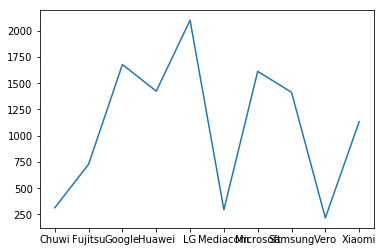

In [61]:
company_mean_price=df.groupby("Company").Price.mean()
print(company_mean_price[others])
%matplotlib inline
plt.plot( company_mean_price[others] )

In [57]:
others=list(others[others!="Razer"])
others

['Chuwi',
 'Fujitsu',
 'Google',
 'Huawei',
 'LG',
 'Mediacom',
 'Microsoft',
 'Samsung',
 'Vero',
 'Xiaomi']

In [58]:
df["Aggregated_Company"]=df.Company.map(lambda x: x if x not in others else "Others")

In [59]:
df[df["Aggregated_Company"]=="Others"][["Aggregated_Company", "Company"]].head()#.count()

,Aggregated_Company,Company
31,Others,Chuwi
72,Others,Microsoft
107,Others,Microsoft
174,Others,Huawei
188,Others,Xiaomi


In [60]:
save=False
if save:
    df.to_csv("../data/Laptop2.csv")